# Overview 
In this notebook we perform following actions. 
* Download wikipedia data from figshare.
* Perform some initial data anaylysis. 
* Try to answer some questions. 

The next section of code perfroms some intilization steps.

In [2]:
import pandas as pd 
import requests

# Download data 
This section of code will downsload data for [figshare](https://figshare.com/projects/Wikipedia_Talk/16731)  webstie. 
In this section we download data reated to toxicity and aggression data sets. Each file is a tab separated file. We will define a utility function to  download the url and save files to repository. 


In [7]:
urls_dict = {
    'toxicity_annotations':'https://ndownloader.figshare.com/files/7394539',
    'toxicity_comments': 'https://ndownloader.figshare.com/files/7394542',
    'toxicity_worker': 'https://ndownloader.figshare.com/files/7640581',   
    'aggression_annotations': 'https://ndownloader.figshare.com/files/7038038',
    'aggression_comments': 'https://ndownloader.figshare.com/files/7394506',
    'aggression_worker': 'https://ndownloader.figshare.com/files/7640644'   
}

def download_data(url, file_name):
    resp = requests.get(url)
    if resp.ok:
        with open(file_name, 'wb') as data_file:
            data_file.write(resp.content)
    else:
        print( "Couldn't download data from {}, status code {}".format(url, resp.status))

for k,v in urls_dict.items():
    download_data(v, '{}.tsv'.format(k))


# Reading data

This section of the code reads the files downloaded and converts to pandas dataframe. We look at summary of data.

In [8]:
toxicity_annotations = pd.read_csv('toxicity_annotations.tsv', sep = '\t', index_col = 0)
print("toxicity annotations shape {}".format(toxicity_annotations.shape))

toxicity_comments = pd.read_csv('toxicity_comments.tsv',  sep = '\t')
print("toxicity comments shape {}".format(toxicity_comments.shape))

toxicity_worker = pd.read_csv('toxicity_worker.tsv',  sep = '\t')
print("toxicity worker shape {}".format(toxicity_comments.shape))

aggression_annotations = pd.read_csv('aggression_annotations.tsv', sep = '\t', index_col = 0)
print("aggression annotations shape {}".format(toxicity_annotations.shape))

aggression_comments = pd.read_csv('aggression_comments.tsv',  sep = '\t')
print("aggression comments shape {}".format(toxicity_comments.shape))

aggression_worker = pd.read_csv('aggression_worker.tsv',  sep = '\t')
print("aggression worker shape {}".format(toxicity_comments.shape))

C:\Users\koona\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


toxicity annotations shape (1598289, 3)
toxicity comments shape (159686, 7)
toxicity worker shape (159686, 7)
aggression annotations shape (1598289, 3)
aggression comments shape (159686, 7)
aggression worker shape (159686, 7)


# Worker data analysis 
Let us look at the workers that helped classify comments. THis is very important to make sure the workers are representative of the popultion of readers on wikipedia. We have gender , education level, first launguage and age group for demographic data. I want to look at the gende distribution in this case. I found this wikipedia survey result on the demographic of  readers 
https://en.wikipedia.org/wiki/Wikipedia:Reader#:~:text=Reader%20demographics&text=About%2045%25%20of%20readers%20are,more%20than%20once%20a%20week.

According to the survey female readers account for 46% of the total group. Looking at the graph below the workers annotating the comments don't represent the same distribution. 

Text(0.5, 1.0, 'Number of worker by Gender in toxicity dataset')

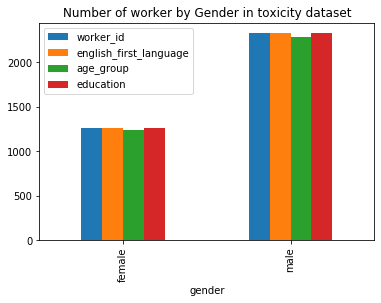

In [26]:
#There is one worker who identifeid as other so lets drop that row for now 
axes  = toxicity_worker[toxicity_worker['gender'] != 'other'].groupby('gender').count().plot.bar()
axes.set_title('Number of worker by Gender in toxicity dataset')

Text(0.5, 1.0, 'Number of worker by Gender in aggression dataset')

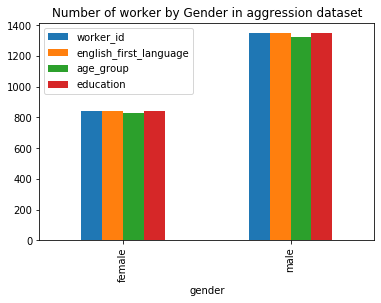

In [27]:
axes  = aggression_worker[aggression_worker['gender'] != 'other'].groupby('gender').count().plot.bar()
axes.set_title('Number of worker by Gender in aggression dataset')

In [20]:
toxicity_worker.groupby('gender').count()

,worker_id,english_first_language,age_group,education
gender,,,,
female,1263,1263,1234,1263
male,2327,2327,2279,2327
other,1,1,1,1


In [21]:
aggression_worker.groupby('gender').count()

,worker_id,english_first_language,age_group,education
gender,,,,
female,840,840,829,840
male,1349,1349,1325,1349
other,1,1,1,1


As Seen from the above data the repesentation of female workers in roughly half of male workers. This could result some skew in the meaning of toxicity. Toxicity might have a different meaning based on the gender worker might belong to. If a model is built on this the training and test sample might have to chagne the distributions of genders to be close the survery results. 